In [55]:
#import stuff we will need
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

#import functions from my .py files
from acquire import get_zillow_data
from prep import remove_outliers,remove_outlier, split_continuous, clean_zillow, train_validate_test, get_object_cols, get_numeric_X_cols, min_max_scale
from explore import plot_variable_pairs, plot_pairplot, plot_categorical_and_continuous_vars, correlation_exploration
from feature_engineering import select_kbest

# Acquire

In [56]:
#acquire our Zillow data from CodeUp server, and turn into .csv
df = get_zillow_data()

In [3]:
df

,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id.1,logerror,transactiondate
0,14634203,2026522,1.0,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,289445.0,2016.0,213516.0,3490.16,NaN,NaN,6.059001e+13,625,-0.061973,2017-08-04
1,11721753,616260,NaN,NaN,NaN,2.0,3.0,NaN,6.0,2.0,...,205123.0,2016.0,163175.0,2627.48,NaN,NaN,6.037220e+13,1018,0.017785,2017-07-21
2,11289917,2061546,1.0,NaN,NaN,2.0,3.0,NaN,6.0,2.0,...,136104.0,2016.0,27214.0,2319.90,Y,15.0,6.037901e+13,1248,-0.362001,2017-06-23
3,11637029,2554497,1.0,NaN,NaN,2.0,3.0,NaN,9.0,2.0,...,810694.0,2016.0,554156.0,9407.01,Y,13.0,6.037701e+13,1734,-0.093399,2017-07-28
4,11705026,1834372,NaN,NaN,NaN,1.0,2.0,NaN,6.0,1.0,...,35606.0,2016.0,23624.0,543.69,NaN,NaN,6.037232e+13,1772,-0.146056,2017-06-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38617,14453399,356752,NaN,NaN,NaN,3.0,5.0,NaN,NaN,3.0,...,852813.0,2016.0,496831.0,11662.88,NaN,NaN,6.059032e+13,72840,0.062928,2017-08-31
38618,12019061,2108804,1.0,NaN,NaN,2.0,1.0,NaN,9.0,2.0,...,492395.0,2016.0,366200.0,6023.37,NaN,NaN,6.037701e+13,72841,0.000231,2017-08-31
38619,11570288,108621,1.0,NaN,NaN,2.0,2.0,NaN,7.0,2.0,...,600608.0,2016.0,446625.0,7255.87,NaN,NaN,6.037264e+13,72842,-0.003178,2017-08-31
38620,11128688,2001476,1.0,NaN,NaN,3.0,5.0,NaN,7.0,3.0,...,1120000.0,2016.0,728000.0,13663.03,NaN,NaN,6.037108e+13,72843,0.024946,2017-08-31


# Prepare

In [57]:
df = clean_zillow(df)

In [58]:
df

,sqft,baths,beds,tax_value
parcel_id,,,,
14634203,1125.0,2.0,3.0,289445.0
11721753,1316.0,2.0,3.0,205123.0
11289917,1458.0,2.0,3.0,136104.0
11637029,1766.0,2.0,3.0,810694.0
11705026,1421.0,1.0,2.0,35606.0
...,...,...,...,...
14453399,3015.0,3.0,5.0,852813.0
12019061,769.0,2.0,1.0,492395.0
11570288,1212.0,2.0,2.0,600608.0


In [59]:
df = remove_outlier(df)

In [60]:
df

,sqft,baths,beds,tax_value
parcel_id,,,,
14634203,1125.0,2.0,3.0,289445.0
11721753,1316.0,2.0,3.0,205123.0
11289917,1458.0,2.0,3.0,136104.0
11637029,1766.0,2.0,3.0,810694.0
11705026,1421.0,1.0,2.0,35606.0
...,...,...,...,...
14453399,3015.0,3.0,5.0,852813.0
12019061,769.0,2.0,1.0,492395.0
11570288,1212.0,2.0,2.0,600608.0


In [8]:
df.isna().sum()

sqft         0
baths        0
beds         0
tax_value    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37420 entries, 14634203 to 10713993
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sqft       37420 non-null  float64
 1   baths      37420 non-null  float64
 2   beds       37420 non-null  float64
 3   tax_value  37420 non-null  float64
dtypes: float64(4)
memory usage: 1.4 MB


In [10]:
df.baths.value_counts().sum()

37420

In [11]:
df.beds.value_counts().sum()

37420

In [12]:
#train, validate, test = split_continuous(df)

In [13]:
target = 'tax_value'

In [14]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = train_validate_test(df, target)

In [15]:
train.shape, validate.shape, test.shape

((20955, 4), (8981, 4), (7484, 4))

In [16]:
obj_cols = get_object_cols(df)

In [17]:
num_cols = get_numeric_X_cols(X_train, obj_cols)

In [18]:
X_train_scaled, X_validate_scaled, X_test_scaled = min_max_scale(X_train, X_validate, X_test, num_cols)

In [19]:
X_train_scaled

,sqft,baths,beds
11611304,0.831471,1.0,0.833333
12806326,0.204143,0.2,0.500000
13093425,0.230447,0.4,0.500000
10809075,0.296089,0.4,0.666667
13940564,0.580307,0.6,0.833333
...,...,...,...
12042952,0.092644,0.2,0.166667
10789218,0.376629,0.4,0.500000
12522814,0.294926,0.4,0.333333
13960517,0.412709,0.5,0.666667


In [20]:
#df = remove_outlier(df)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37420 entries, 14634203 to 10713993
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sqft       37420 non-null  float64
 1   baths      37420 non-null  float64
 2   beds       37420 non-null  float64
 3   tax_value  37420 non-null  float64
dtypes: float64(4)
memory usage: 1.4 MB


# Explore

In [22]:
cols = ['sqft', 'baths','beds','tax_value']

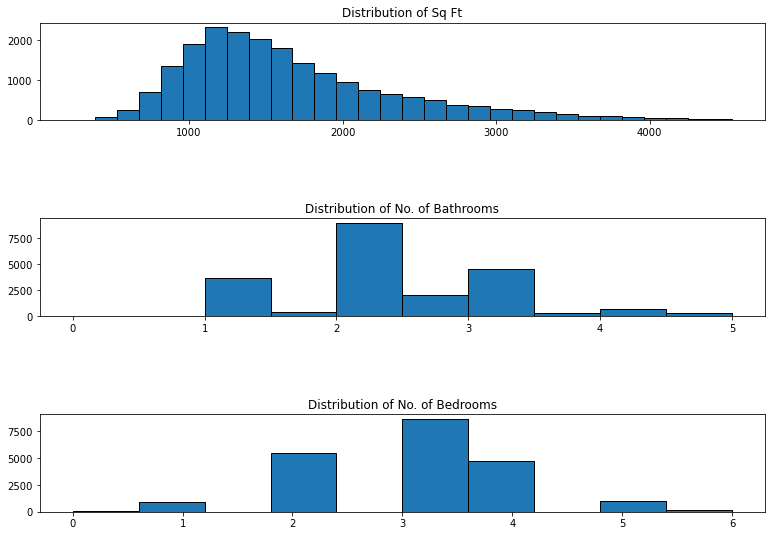

In [23]:
plt.figure(figsize=(13,9))
plt.subplot(3,1,1, title='Distribution of Sq Ft')
plt.hist(data=train, x='sqft', bins = 30,ec='black')

plt.subplot(3,1,2, title='Distribution of No. of Bathrooms')
plt.hist(data=train, x='baths', ec='black')

plt.subplot(3,1,3, title='Distribution of No. of Bedrooms')
plt.hist(data=train, x='beds',ec='black')

plt.subplots_adjust(hspace=1)
plt.show()

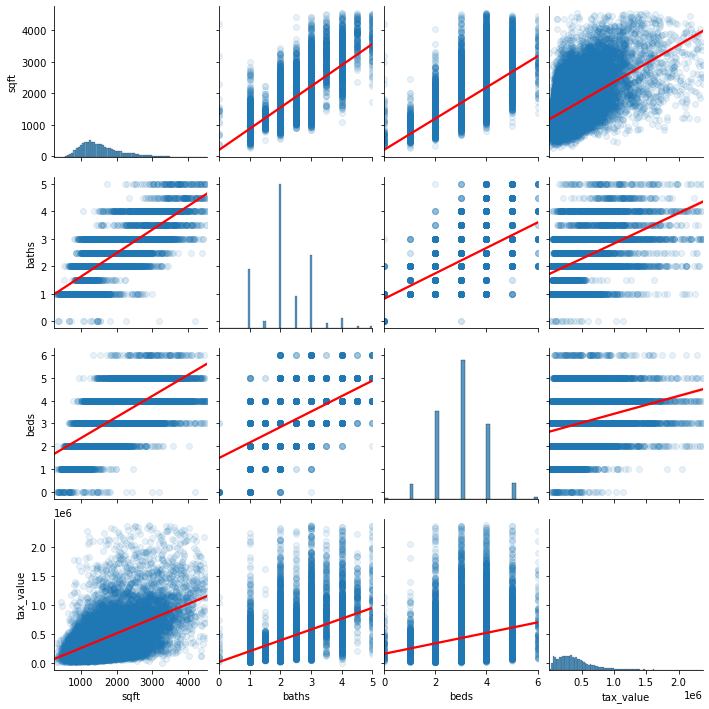

In [24]:
plot_variable_pairs(train, cols)

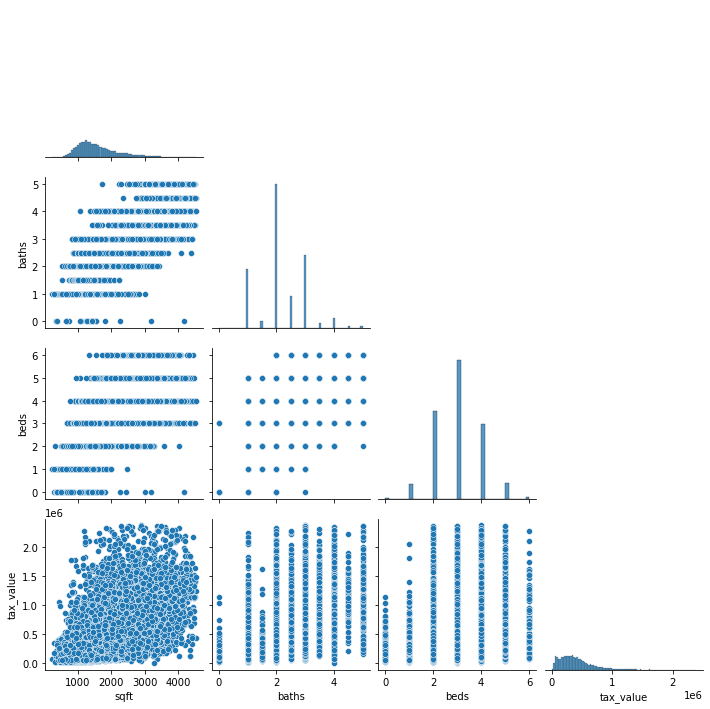

In [25]:
plot_pairplot(train, cols, hue=None)

In [26]:
#plot_categorical_and_continuous_vars('beds', 'tax_value', train)

In [27]:
def get_heatmap(train):
    plt.figure(figsize=(8,12))
    heatmap = sns.heatmap(df.corr()[['tax_value']].sort_values(by='tax_value', ascending=False), vmin=-.5, vmax=.5, annot=True)
    heatmap.set_title('Feautures Correlating with Value')
    
    return heatmap

<AxesSubplot:title={'center':'Feautures Correlating with Value'}>

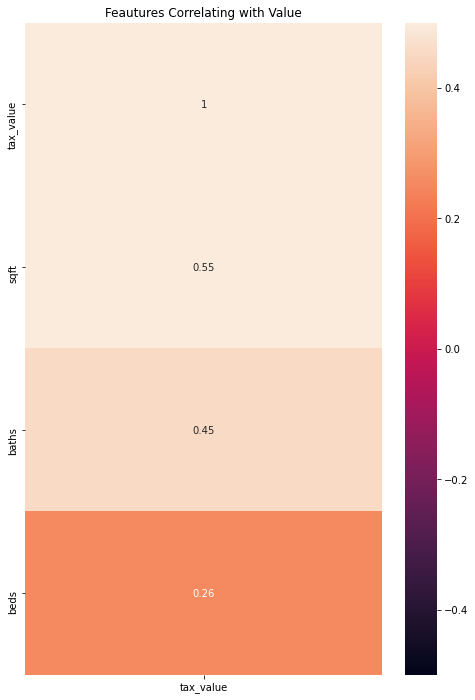

In [28]:
get_heatmap(train)

In [29]:
def correlation_exploration(train, x_string, y_string):
    '''
    This function takes in a df, a string for an x-axis variable in the df, 
    and a string for a y-axis variable in the df and displays a scatter plot, the r-
    squared value, and the p-value. It explores the correlation between input the x 
    and y variables.
    '''
    r, p = stats.pearsonr(train[x_string], train[y_string])
    df.plot.scatter(x_string, y_string)
    plt.title(f"{x_string}'s Relationship with {y_string}")
    print(f'The p-value is: {p}. There is {round(p,3)}% chance that we see these results by chance.')
    print(f'r = {round(r, 2)}')
    plt.show()

The p-value is: 0.0. There is 0.0% chance that we see these results by chance.
r = 0.46


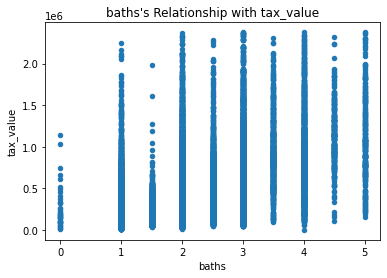

In [30]:
correlation_exploration(train, 'baths', 'tax_value')

The p-value is: 0.0. There is 0.0% chance that we see these results by chance.
r = 0.27


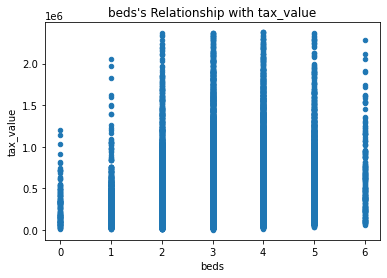

In [31]:
correlation_exploration(train, 'beds', 'tax_value')

The p-value is: 0.0. There is 0.0% chance that we see these results by chance.
r = 0.76


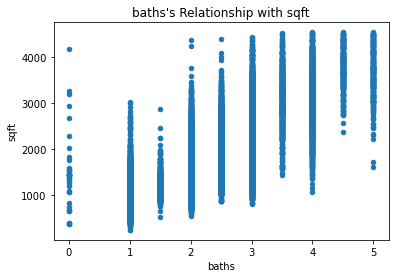

In [32]:
correlation_exploration(train, 'baths', 'sqft')

The p-value is: 0.0. There is 0.0% chance that we see these results by chance.
r = 0.67


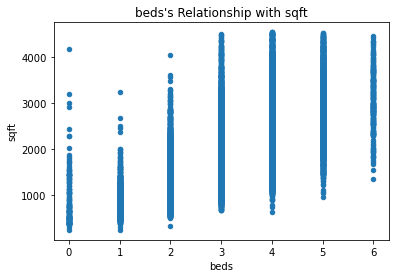

In [33]:
correlation_exploration(train, 'beds', 'sqft')

The p-value is: 0.0. There is 0.0% chance that we see these results by chance.
r = 0.55


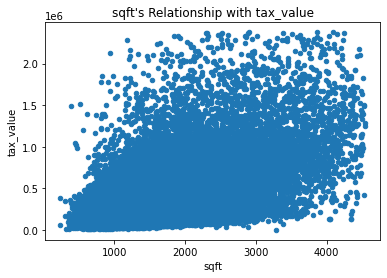

In [34]:
correlation_exploration(train, 'sqft', 'tax_value')

In [35]:
null_hypothesis = "Houses with 3 bedrooms or more and houses with less than 3 bedrooms are independent to value of home"
alternative_hypothesis = "Houses with 3 bedrooms or more and houses with less than 3 bedrooms are related to value of home"
a = 0.05 #a for alpha 

three_or_more_beds = train[train.beds>=3]
less_than_three_beds = train[train.beds<3]
t, p = stats.ttest_ind(three_or_more_beds.tax_value, less_than_three_beds.tax_value)

if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

Reject null hypothesis that: Houses with 3 bedrooms or more and houses with less than 3 bedrooms are independent to value of home
There is evidence to suggest: Houses with 3 bedrooms or more and houses with less than 3 bedrooms are related to value of home


In [36]:
null_hypothesis = "Houses with 3 bathrooms or more and houses with less than 3 bathrooms are independent to value of home"
alternative_hypothesis = "Houses with 3 bathrooms or more and houses with less than 3 bathrooms are related to value of home"
a = 0.05 #a for alpha 

three_or_more_baths = train[train.baths>=3]
less_than_three_baths = train[train.baths<3]
t, p = stats.ttest_ind(three_or_more_baths.tax_value, less_than_three_baths.tax_value)

if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

Reject null hypothesis that: Houses with 3 bathrooms or more and houses with less than 3 bathrooms are independent to value of home
There is evidence to suggest: Houses with 3 bathrooms or more and houses with less than 3 bathrooms are related to value of home


In [37]:
corr, p = stats.pearsonr(train.beds, train.tax_value)
corr, p

(0.2654976814960714, 0.0)

In [38]:
corr, p = stats.pearsonr(train.baths, train.tax_value)
corr, p

(0.45509599269384954, 0.0)

In [39]:
corr, p = stats.pearsonr(train.sqft, train.tax_value)
corr, p

(0.547521336285306, 0.0)

In [40]:
corr, p = stats.pearsonr(train.baths, train.beds)
corr, p

(0.5588822066415807, 0.0)

In [41]:
corr, p = stats.pearsonr(train.baths, train.sqft)
corr, p

(0.7591387143779618, 0.0)

In [42]:
corr, p = stats.pearsonr(train.beds, train.sqft)
corr, p

(0.6746301959584082, 0.0)

In [43]:
select_kbest(X_train_scaled, y_train,2)

['sqft', 'baths']

# Modeling

### Baseline

In [44]:
#turning my y_train and y_validate to dataframes so we can append new columns
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

#tax_value mean
tax_value_pred_mean = y_train['tax_value'].mean()
y_train['tax_value_pred_mean'] = tax_value_pred_mean
y_validate['tax_value_pred_mean'] = tax_value_pred_mean

#tax_value_median
tax_value_pred_median = y_train['tax_value'].median()
y_train['tax_value_pred_median'] = tax_value_pred_median
y_validate['tax_value_pred_median'] = tax_value_pred_median

#RMSE of tax_value_pred_mean
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_mean)**(1/2)

print('BASELINE')
print('--------------------')
print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))
print('--------------------')

#RMSE of tax_value_pred_median
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_median)**(1/2)
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_median)**(1/2)

print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

BASELINE
--------------------
RMSE using Mean
Train/In-Sample:  331498.86 
Validate/Out-of-Sample:  339726.65
--------------------
RMSE using Median
Train/In-Sample:  339731.72 
Validate/Out-of-Sample:  349090.59


In [45]:
r2_baseline = r2_score(y_validate.tax_value, y_validate.tax_value_pred_mean)
print(f'The r^2 score for baseline is {r2_baseline}')

The r^2 score for baseline is -0.0003346991103794217


### LinearRegression(OLS)

In [46]:
#create model object
lm = LinearRegression(normalize=True)

#fit the model to our training data, specify column since it is a dataframe
lm.fit(X_train_scaled,y_train.tax_value)

#predict train
y_train['tax_value_pred_lm'] = lm.predict(X_train_scaled)

#evaluate the RMSE for train
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lm)**(1/2)

#predict validate
y_validate['tax_value_pred_lm'] = lm.predict(X_validate_scaled)

#evaluate the RMSE for validate
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lm)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ",rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  272322.6281099025 
Validation/Out-of-Sample:  278619.8387871825


In [47]:
r2_score_lm = r2_score(y_validate.tax_value, y_validate.tax_value_pred_lm)
r2_score_lm

0.32716252343435726

In [48]:
#create model object
lars = LassoLars(alpha=1.0)

#fit the model to our training data, specify column since it is a dataframe
lars.fit(X_train_scaled,y_train.tax_value)

#predict train
y_train['tax_value_pred_lars'] = lars.predict(X_train_scaled)

#evaluate the RMSE for train
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lars)**(1/2)

#predict validate
y_validate['tax_value_pred_lars'] = lars.predict(X_validate_scaled)

#evaluate the RMSE for validate
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lars)**(1/2)

print("RMSE for OLS using Lasso+Lars\nTraining/In-Sample: ",rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using Lasso+Lars
Training/In-Sample:  272322.87816203985 
Validation/Out-of-Sample:  278634.87296625203


In [49]:
r2_score_lars = r2_score(y_validate.tax_value, y_validate.tax_value_pred_lars)
r2_score_lars

0.3270899095668992

### TweedieRegressor

In [50]:
#create model object
glm = TweedieRegressor(power =0, alpha=0.0)

#fit the model to our training data, specify column since it is a dataframe
glm.fit(X_train_scaled,y_train.tax_value)

#predict train
y_train['tax_value_pred_glm'] = glm.predict(X_train_scaled)

#evaluate the RMSE for train
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_glm)**(1/2)

#predict validate
y_validate['tax_value_pred_glm'] = glm.predict(X_validate_scaled)

#evaluate the RMSE for validate
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_glm)**(1/2)

print("RMSE for OLS using TweedieRegressor\nTraining/In-Sample: ",rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using TweedieRegressor
Training/In-Sample:  272322.6281099025 
Validation/Out-of-Sample:  278619.8387890302


In [51]:
r2_score_glm = r2_score(y_validate.tax_value, y_validate.tax_value_pred_glm)
r2_score_glm

0.3271625234254335

### Polynomial Regression

In [52]:
#making polynomial features to get a new set of features
pf = PolynomialFeatures(degree=4)

#fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train_scaled)

#transform X_validate_scaled, and X_test_scaled
X_validate_degree2 = pf.transform(X_validate_scaled)
X_test_degree2 = pf.transform(X_test_scaled)

In [53]:
#okay let's do linear regression again
lm2 = LinearRegression(normalize=True)

#fit the model using scaled X_train, once again specify y_train column
lm2.fit(X_train_degree2, y_train.tax_value)

#predict train
y_train['tax_value_pred_lm2'] = lm2.predict(X_train_degree2)

#evaluate rmse for train
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lm2)**(1/2)

#predict validate
y_validate['tax_value_pred_lm2'] = lm2.predict(X_validate_degree2)

#evaluate rmse for validate
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lm2)**(1/2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  270323.34542153287 
Validation/Out-of-Sample:  276876.70403433935


In [54]:
r2_score_lm2 = r2_score(y_validate.tax_value, y_validate.tax_value_pred_lm2)
r2_score_lm2

0.3355551601008204